<a href="https://colab.research.google.com/github/jfkoehler/nyu_bootcamp_fa24/blob/main/homework/regression_hw_solns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A Regression Model for Wages

This homework assignment works through creating a regression model to predict the wage of an individual given some basic demographic information.  The dataset is from the openml data repository and was culled from Census data -- see information [here](https://www.openml.org/search?type=data&sort=runs&id=534&status=active).  

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
survey = fetch_openml(data_id=534, as_frame=True)

In [3]:
df = survey.frame
df.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married


**PROBLEM 1: Splitting the data.**

Use the `train_test_split` function to create a train and test dataset for all features and the target column `WAGE`.  Your test set should be comprised of 20% of the total data.

In [4]:
X = df.drop('WAGE', axis = 1)
y = df['WAGE']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

**PROBLEM 2: Checking Assumptions**

One assumption of the Linear Regression model is that the target feature is roughly normally distributed.  Is this assumption met?  If yes move on, if no consider transforming the target using `np.log` and compare the distribution of the logarithm of wages.  If the logarithm is more "normal", use this as your target.

In [7]:
import matplotlib.pyplot as plt

(array([138., 208., 119.,  35.,  22.,  11.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  5.35,  9.7 , 14.05, 18.4 , 22.75, 27.1 , 31.45, 35.8 ,
        40.15, 44.5 ]),
 <BarContainer object of 10 artists>)

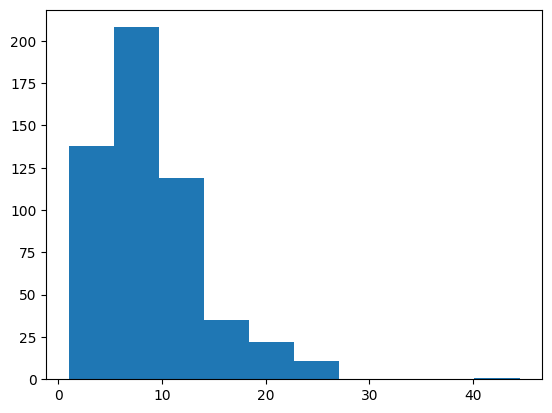

In [8]:
plt.hist(y)

In [10]:
import numpy as np

(array([  1.,   2.,   3.,  88., 122., 132., 118.,  47.,  20.,   1.]),
 array([0.        , 0.37954892, 0.75909784, 1.13864676, 1.51819568,
        1.89774459, 2.27729351, 2.65684243, 3.03639135, 3.41594027,
        3.79548919]),
 <BarContainer object of 10 artists>)

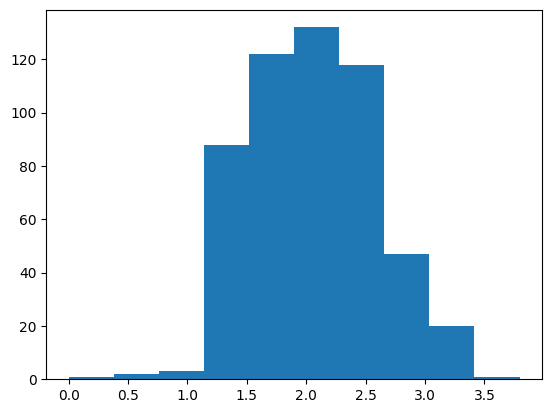

In [11]:
plt.hist(np.log(y))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y))

**PROBLEM 3: Preparing the Data**

For the categorical features, use the `OneHotEncoder` to encode the different categorical variables and eliminate any reduntant information using the `drop = 'if_binary'` argument.

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
ohe = OneHotEncoder(drop = 'if_binary')

**PROBLEM 4: Using `make_column_transformer`**

Rather than taking just the categorical features, transforming these, and merging the dummied data with the other numeric features -- `make_column_transformer` will accomplish this for us.  Look over the user guide [here](https://scikit-learn.org/stable/modules/compose.html#make-column-transformer) and use this to transform the categorical features with `OneHotEncoder` and leave the remaining features as is.  Be sure to transform both your training and test datasets correctly and assign as `X_train_encoded` and `X_test_encoded` below.

In [15]:
from sklearn.compose import make_column_transformer

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    int64   
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    int64   
 4   UNION       534 non-null    category
 5   AGE         534 non-null    int64   
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), int64(3)
memory usage: 17.2 KB


In [18]:
transformer = make_column_transformer((ohe, X.select_dtypes('category').columns),
                                      remainder = 'passthrough')

In [19]:
X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded = transformer.transform(X_test)

In [20]:
X_train_encoded

array([[ 1.,  1.,  1., ..., 16., 10., 32.],
       [ 1.,  1.,  1., ..., 12., 38., 56.],
       [ 0.,  0.,  1., ...,  9., 42., 57.],
       ...,
       [ 0.,  1.,  1., ..., 18., 19., 43.],
       [ 0.,  0.,  1., ..., 12., 16., 34.],
       [ 0.,  0.,  1., ..., 12.,  3., 21.]])

**PROBLEM 5: Building the model**

Now that your data is prepared, build a regression model with the appropriate input and target values.  

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression().fit(X_train_encoded, y_train)

**PROBLEM 6: Scoring the Model**

Now, evaluate the **Mean Squared Error** of your model on both the train and test data.  Compare this with a baseline prediction **Mean Squared Error**.  Did you model perform better than the baseline?

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y_train, lr.predict(X_train_encoded))

0.18064134509054042

In [25]:
mean_squared_error(y_test, lr.predict(X_test_encoded))

0.17430039002786285

In [26]:
y_train.mean()

2.077643004789766

In [27]:
mean_squared_error(y_train, y_train.mean()*np.ones(len(y_train)))

0.27186096776904806

In [28]:
mean_squared_error(y_test, y_test.mean()*np.ones(len(y_test)))

0.29223555308811

**PROBLEM 7: Interpreting Coefficients**

Examine your coefficients for the model.  Using complete sentences explain which of the features seem to lead to increases in wages, and which seem to lead to a decrease in wage.

In [31]:
import pandas as pd

In [34]:
pd.DataFrame(lr.coef_, index = transformer.get_feature_names_out(), columns = ['coef']).sort_values('coef')

,coef
onehotencoder__UNION_not_member,-0.235565
onehotencoder__OCCUPATION_Service,-0.166745
onehotencoder__SOUTH_yes,-0.105226
onehotencoder__OCCUPATION_Sales,-0.093012
onehotencoder__SECTOR_Other,-0.070408
onehotencoder__OCCUPATION_Other,-0.067503
onehotencoder__RACE_Other,-0.053724
remainder__AGE,-0.047660
onehotencoder__MARR_Unmarried,-0.030164
onehotencoder__OCCUPATION_Clerical,0.001884


**PROBLEM 8: Polynomial Features**

After building a basic model using all the features, compare this to a model using a quadratic polynomial.  Use `PolynomialFeatures` to create the features and score the train and test data as before.  Did this model perform better than the baseline or linear model?

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
transformer = make_column_transformer((ohe, X.select_dtypes('category').columns),
                                      remainder = PolynomialFeatures())

In [37]:
X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded = transformer.transform(X_test)

In [38]:
X_train_encoded.shape

(400, 26)

In [39]:
lr2 = LinearRegression().fit(X_train_encoded, y_train)

In [40]:
mean_squared_error(y_train, lr2.predict(X_train_encoded))

0.1737702817911344

In [41]:
mean_squared_error(y_test, lr2.predict(X_test_encoded))

0.17077403825135656

**PROBLEM 9: Feature Selection**

One of the downsides to the polynomial features is how many new features are introduced into the model.  To limit this, you can use *Feature Selection* once the polynomial terms have been generated.  Explore the `feature_selection` module [here](https://scikit-learn.org/stable/modules/feature_selection.html) and use a feature selector to limit the polynomial features to the 15 "most important" features.  Which of the features were selected?

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [50]:
from sklearn import set_config

In [55]:
ohe = OneHotEncoder(drop = 'if_binary', sparse_output=False)

In [57]:
set_config(transform_output="pandas")
selector = SelectKBest(f_regression, k = 15)
transformer = make_column_transformer((ohe, X.select_dtypes('category').columns),
                                      remainder = PolynomialFeatures(),
                                      verbose_feature_names_out=False)

X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded = transformer.transform(X_test)
selector.fit_transform(X_train_encoded, y_train)

,SOUTH_yes,SEX_male,UNION_not_member,RACE_White,OCCUPATION_Clerical,OCCUPATION_Management,OCCUPATION_Professional,OCCUPATION_Service,EDUCATION,EXPERIENCE,AGE,EDUCATION^2,EDUCATION EXPERIENCE,EDUCATION AGE,AGE^2
185,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,16.0,10.0,32.0,256.0,160.0,512.0,1024.0
145,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,12.0,38.0,56.0,144.0,456.0,672.0,3136.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,42.0,57.0,81.0,378.0,513.0,3249.0
223,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,14.0,5.0,25.0,196.0,70.0,350.0,625.0
317,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,29.0,47.0,144.0,348.0,564.0,2209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,44.0,60.0,100.0,440.0,600.0,3600.0
234,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,13.0,4.0,23.0,169.0,52.0,299.0,529.0
455,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,18.0,19.0,43.0,324.0,342.0,774.0,1849.0
53,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12.0,16.0,34.0,144.0,192.0,408.0,1156.0


In [58]:
selector.get_feature_names_out()

array(['SOUTH_yes', 'SEX_male', 'UNION_not_member', 'RACE_White',
       'OCCUPATION_Clerical', 'OCCUPATION_Management',
       'OCCUPATION_Professional', 'OCCUPATION_Service', 'EDUCATION',
       'EXPERIENCE', 'AGE', 'EDUCATION^2', 'EDUCATION EXPERIENCE',
       'EDUCATION AGE', 'AGE^2'], dtype=object)

**PROBLEM 10: Interpreting Coefficients**

Build a simple regression model and encode all the categorical features.  Fit the model on the training data. Draw a horizontal bar plot of the coefficients, and interpret the feature importance based on these coefficients.

In [59]:
set_config(transform_output="pandas")
selector = SelectKBest(f_regression, k = 15)
transformer = make_column_transformer((ohe, X.select_dtypes('category').columns),
                                      remainder = 'passthrough',
                                      verbose_feature_names_out=False)

X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded = transformer.transform(X_test)
lr = LinearRegression().fit(X_train_encoded, y_train)

<BarContainer object of 19 artists>

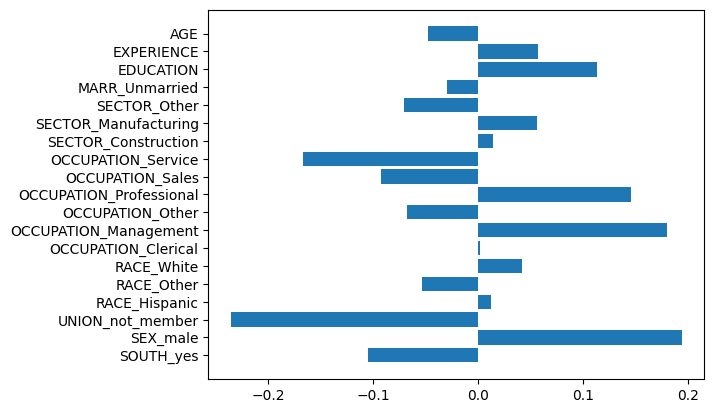

In [62]:
plt.barh(transformer.get_feature_names_out(), lr.coef_)

**PROBLEM 11: Revisiting Interpretation**

Read through the article on [**Common Pitfalls in the interpretation of coefficients of linear models**](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html).  What does the author suggest is a better way of using the coefficients of a linear model to determine the "importance" of a feature?  Draw a horizontal barplot of the updated coefficients and interpret the results.

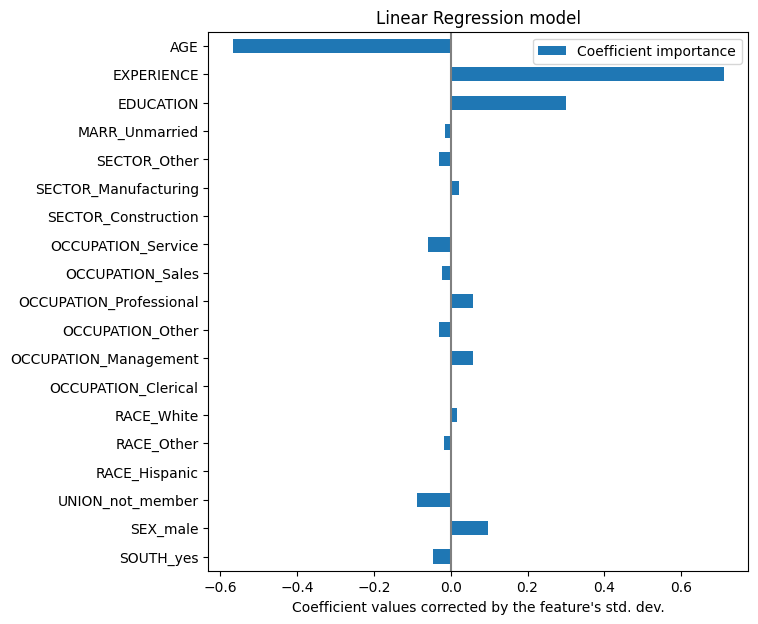

In [65]:
coefs = pd.DataFrame(
    lr.coef_ * X_train_encoded.std(axis=0),
    columns=["Coefficient importance"],
    index=transformer.get_feature_names_out(),
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Linear Regression model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)